# 1. Contexte

Selon le Fonds monétaire international (FMI), l'aide au développement est l'aide accordée par les gouvernements et d'autres organismes pour soutenir le développement économique, environnemental, social et politique des pays en développement.

### 1.1 Énoncé du problème (extrait du jeu de données)

HELP International a réussi à récolter environ 10 millions de dollars. Maintenant, le PDG de l'ONG doit décider comment utiliser cet argent de manière stratégique et efficace.

Ainsi, le PDG doit prendre la décision de choisir les pays qui ont le plus besoin d'aide.

Par conséquent, l'objectif est de catégoriser les pays en utilisant certains facteurs socio-économiques et de santé qui déterminent le développement global du pays. Ensuite, vous devez suggérer les pays sur lesquels le PDG doit se concentrer le plus.

### Quels pays devraient recevoir des fonds et pourquoi ?

# 2. Bibliothèques et Ensembles de Données

### 2.1. Importer les Bibliothèques et les Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# GMMS clustering 
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# geo data
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px

# Modelation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# sauvegarde le modele
from joblib import dump

import warnings
warnings.filterwarnings('ignore')

### 2.2. Importer les Données

In [2]:
data = pd.read_csv(r'C:\Users\dell\Downloads\projet sma\Programmes Sources\Exploration Algorithmique PCA-GM-KNN\Country-data.csv')

# 3. Description des Données et Distribution

### 3.1. Description des données

#### Description des caractéristiques

- country : Nom du pays

- child_mort : Décès d'enfants de moins de 5 ans pour 1000 naissances vivantes

- exports : Exportations de biens et services par habitant. Donné en pourcentage du PIB par habitant

- health : Dépenses totales de santé par habitant. Donné en pourcentage du PIB par habitant

- imports : Importations de biens et services par habitant. Donné en pourcentage du PIB par habitant

- income : Revenu net par personne

- inflation : Mesure du taux de croissance annuel du PIB total

- life_expec : Le nombre moyen d'années qu'un nouveau-né vivrait si les tendances de mortalité actuelles devaient rester les mêmes

- total_fer : Le nombre d'enfants qui naîtraient pour chaque femme si les taux de fécondité par âge actuels devaient rester les mêmes

- gdpp : Le PIB par habitant. Calculé comme le PIB total divisé par la population totale

In [3]:
# Vue rapide des colonnes et des valeurs
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Combien de colonnes et de lignes y a-t-il dans le DataFrame ?
data.shape

(167, 10)

### 3.2. Traitement des Données

- Valeurs manquantes
- Valeurs en double
- Tracés et valeurs aberrantes
- Normalisation

In [5]:
# Y a-t-il des valeurs manquantes ?
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
# Y a-t-il des valeurs en double ?
format(len(data[data.duplicated()]))

'0'

In [7]:
# Mesures statistiques standard
data.describe(percentiles = [.25, .5, .75, .90 ,.95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


Visualisation de toutes les colonnes avec des boîtes à moustaches (Boxplot) et des graphiques de distribution (Distplot) pour identifier la distribution des données et les valeurs aberrantes.

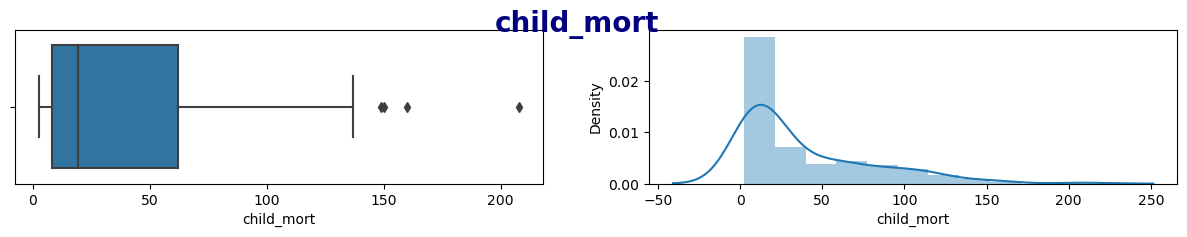

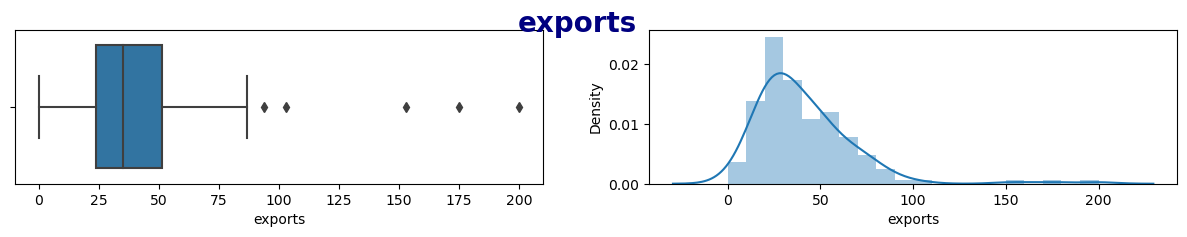

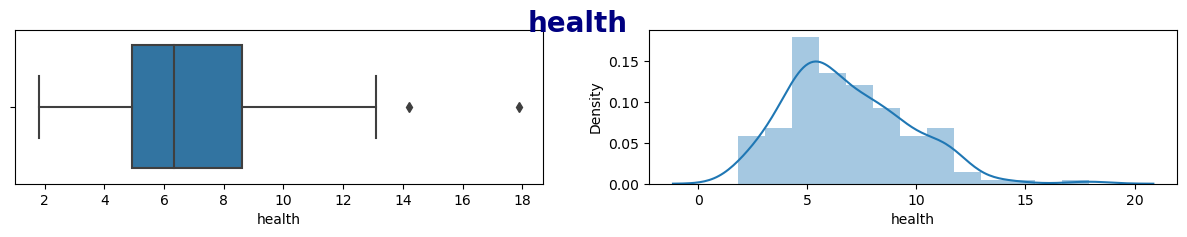

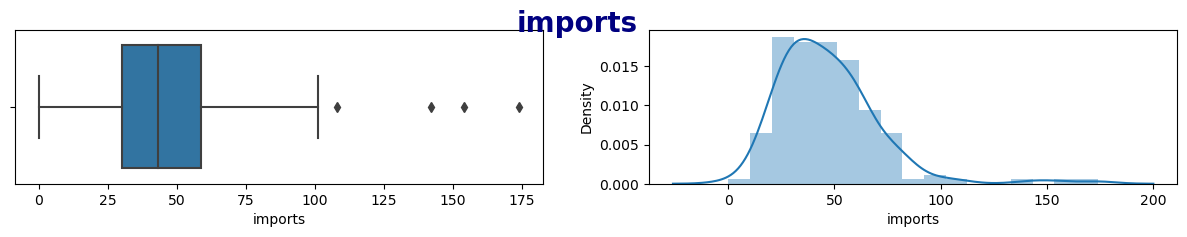

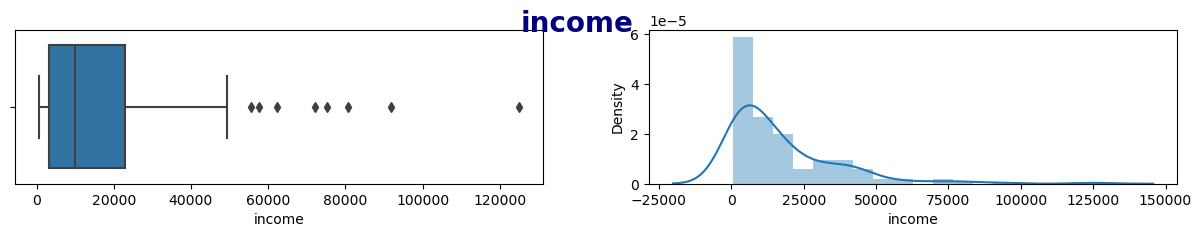

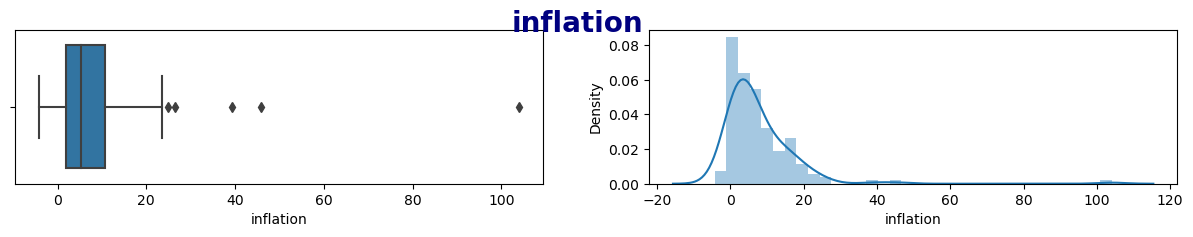

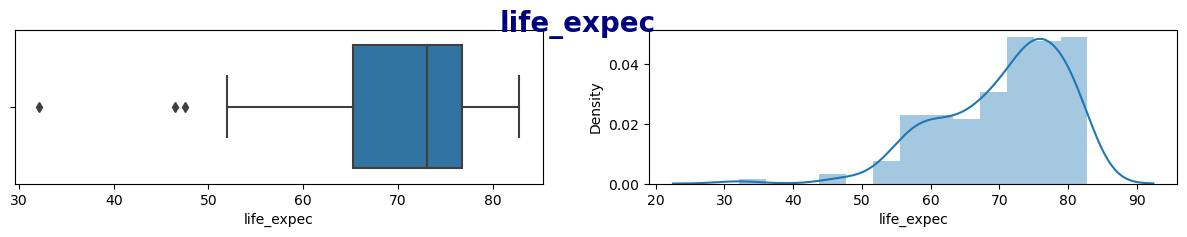

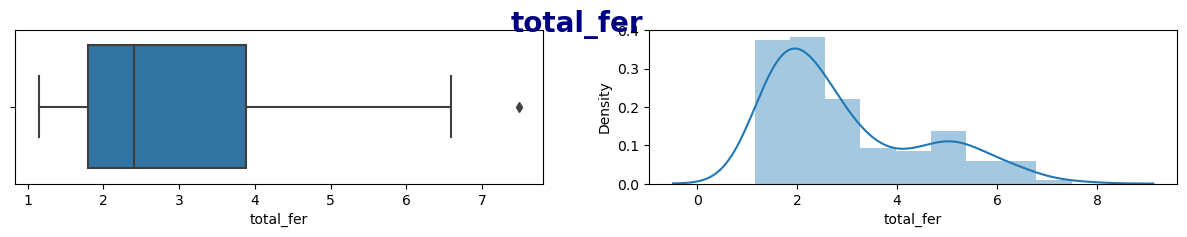

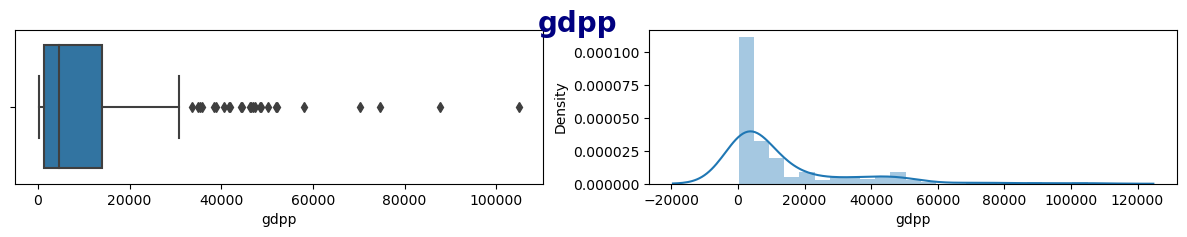

In [8]:
colmns = data.columns

for i in range(1, 10) :
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(colmns[i], fontsize=20, fontweight='bold', color='navy')
    # Left Plot
    sns.boxplot(x=colmns[i], data=data, ax=ax[0])
    # Right Plot
    sns.distplot(data[colmns[i]], ax=ax[1])

In [9]:
len(data['country'].unique()) == len(data)

True

- life_expec affiche une distribution des données inclinée à gauche ou négativement inclinée.
- health affiche une distribution des données normalement distribuée.
- Toutes les autres caractéristiques montrent une distribution des données inclinée à droite ou positivement inclinée.
- La distribution des données du country n'est pas affichée car il s'agit de données textuelles et elle a le même nombre de valeurs uniques que la longueur du dataframe.

Constatations :

- Jeu de données de petite taille.
- Aucune valeur manquante.
- Aucune valeur en double.
- Quelques valeurs aberrantes et distribution inclinée.

Les caractéristiques des pays économiquement défavorisés sont les suivantes :

- Le revenu par habitant du pays est très faible.
- Population élevée qui entraîne une non-disponibilité des ressources.
- Chômage en raison de ressources limitées.
- Faible richesse nationale qui entraîne un faible capital.
- Distribution inéquitable des richesses et des revenus.
- Manque d'aménagements éducatifs adéquats et donc illettrisme prévalent.
- Niveau de vie faible.
- Aucune avancée technique.
- Services de santé médiocres associés à des taux de natalité et de mortalité élevés.
- La Fondation HELP doit cibler les pays qui présentent les caractéristiques ci-dessus. Nous allons maintenant visualiser les données et trouver les pays qui se trouvent aux extrêmes et au centre de chaque caractéristique pour indiquer les pays qui ont besoin d'aide !

#### La Fondation HELP doit cibler les pays qui présentent les caractéristiques ci-dessus. Nous allons maintenant visualiser les données et trouver les pays qui se trouvent aux extrêmes et au centre de chaque caractéristique pour indiquer les pays qui ont besoin d'aide !

### 3.2. Distribution des Données

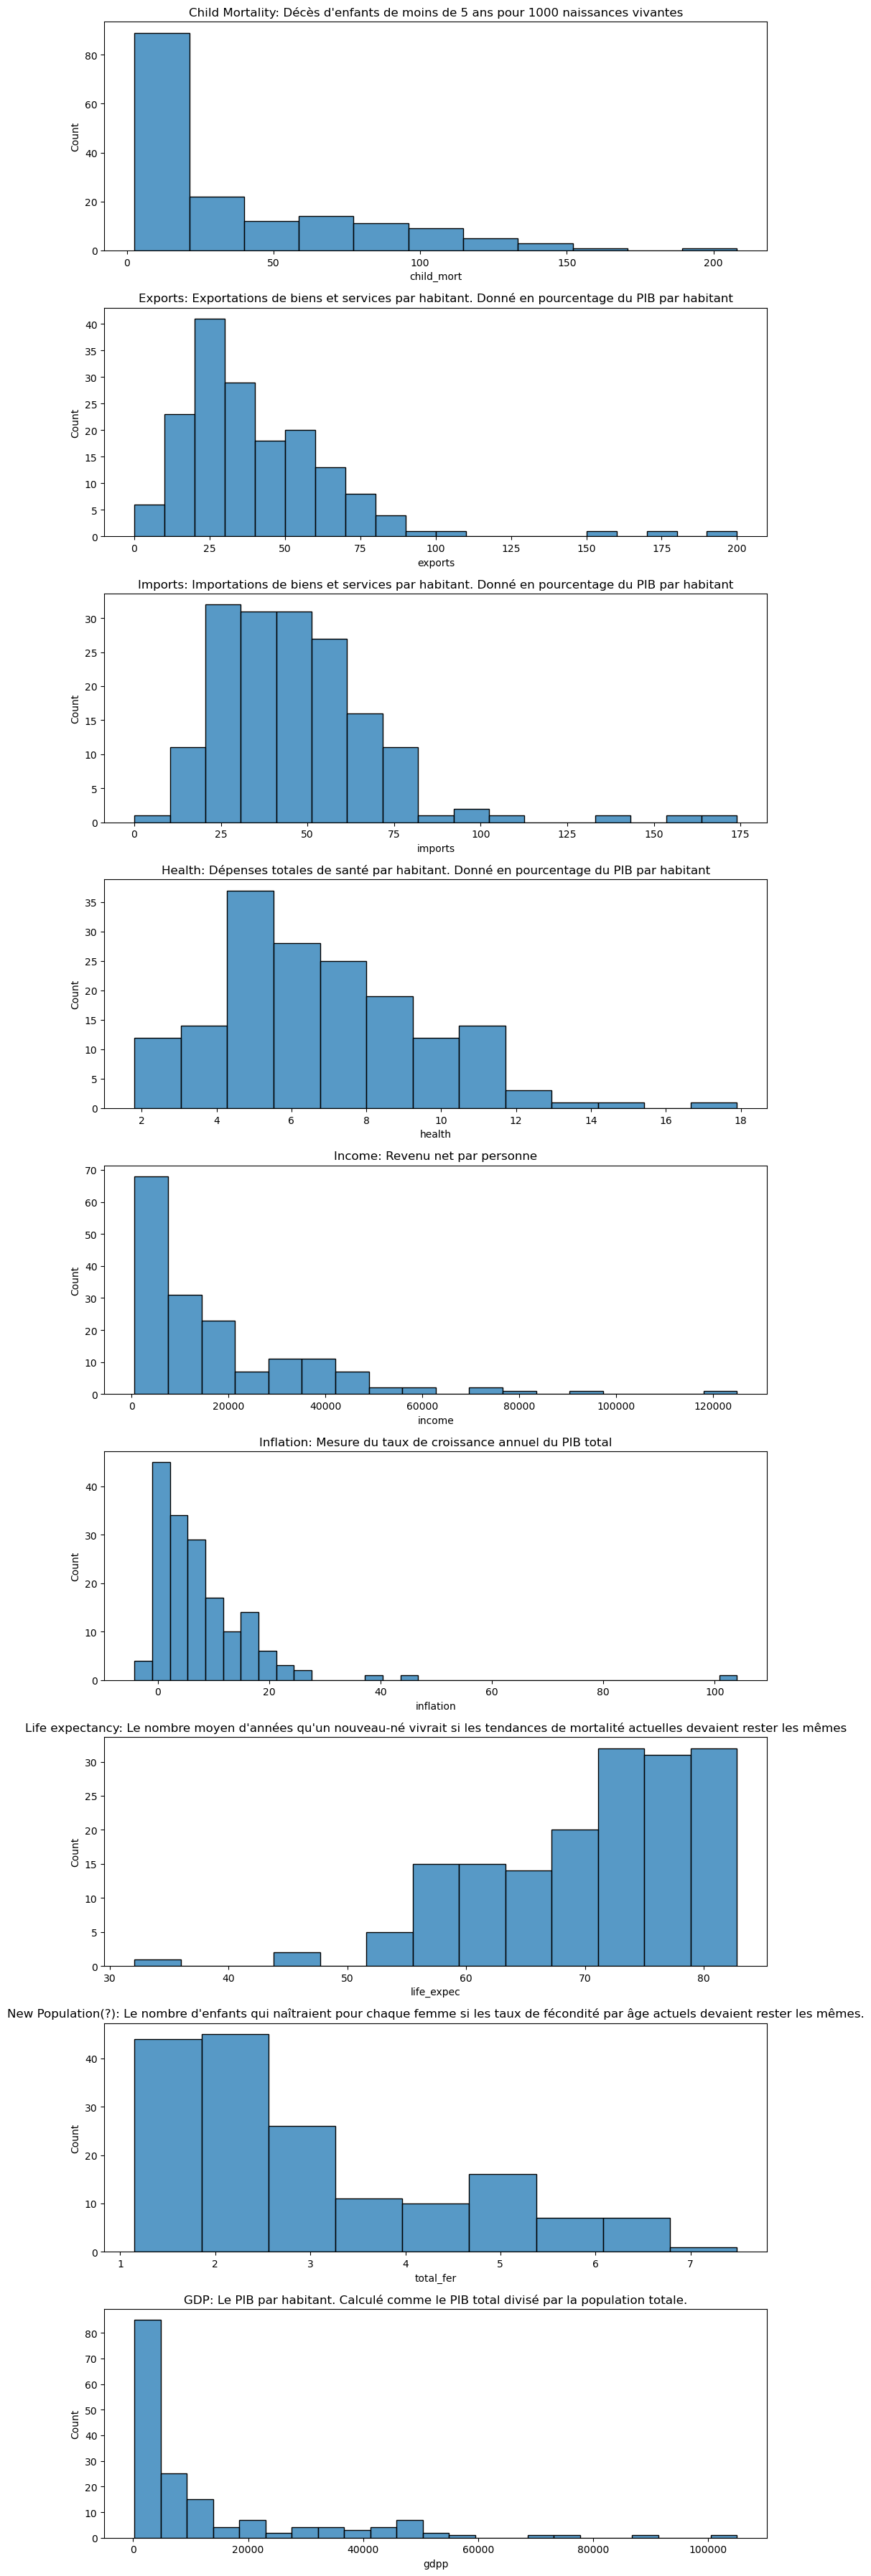

In [10]:
fig, axes = plt.subplots(9, 1, figsize=(10, 36))
axes = axes.flatten()

# Définir les titres et les colonnes correspondantes
titles = [  "Child Mortality: Décès d'enfants de moins de 5 ans pour 1000 naissances vivantes",
            "Exports: Exportations de biens et services par habitant. Donné en pourcentage du PIB par habitant",
            "Imports: Importations de biens et services par habitant. Donné en pourcentage du PIB par habitant",
            "Health: Dépenses totales de santé par habitant. Donné en pourcentage du PIB par habitant",
            "Income: Revenu net par personne",
            "Inflation: Mesure du taux de croissance annuel du PIB total",
            "Life expectancy: Le nombre moyen d'années qu'un nouveau-né vivrait si les tendances de mortalité actuelles devaient rester les mêmes",
            "New Population(?): Le nombre d'enfants qui naîtraient pour chaque femme si les taux de fécondité par âge actuels devaient rester les mêmes.",
            "GDP: Le PIB par habitant. Calculé comme le PIB total divisé par la population totale."]
columns = ["child_mort", "exports", "imports", "health", "income", "inflation", "life_expec", "total_fer", "gdpp"]

# Plot chaque histogram
for ax, title, column in zip(axes, titles, columns):
    sns.histplot(data[column], ax=ax)
    ax.set_title(title)

# Ajutement de layout
plt.tight_layout()
plt.show()


Constatations :

- En examinant la distribution des données, nous pouvons constater que certaines caractéristiques ont effectivement des valeurs aberrantes.
- Dans le cadre de cette analyse, les valeurs aberrantes ne seront pas supprimées car elles pourraient être considérées comme très informatives en ce sens qu'elles pourraient indiquer les pays en situation critique et ayant besoin d'aide.
- Par exemple, la mortalité infantile est un indicateur fort de la pauvreté et de la nécessité, donc les valeurs aberrantes dans cette caractéristique montrent qu'il y a des pays avec un nombre de mortalité infantile plus élevé que la normale/critique.

# 4. Feature Engineering

### 4.1. Matrice de Corrélation : Nous utilisons une Heatmap pour trouver les relations entre les caractéristiques.

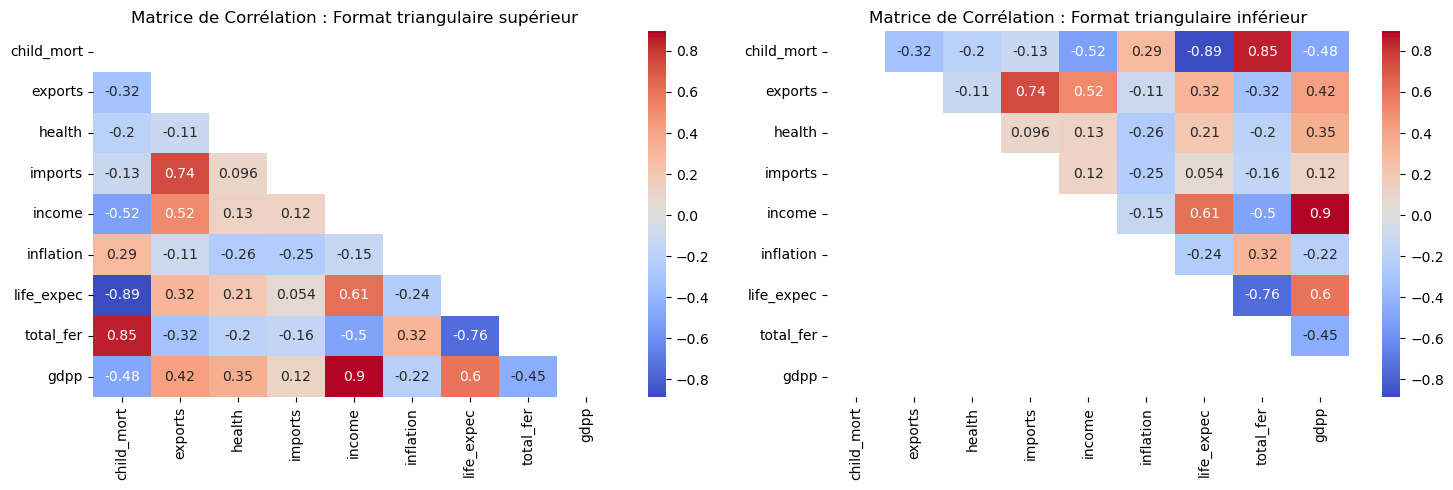

In [11]:
col = list(data.columns)
col.remove('country')

numerical_features = [*col]

ut = np.triu(data[numerical_features].corr())
lt = np.tril(data[numerical_features].corr())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(data[numerical_features].corr(), cmap='coolwarm', annot=True, cbar=True, mask=ut)
plt.title('Matrice de Corrélation : Format triangulaire supérieur')

plt.subplot(1, 2, 2)
sns.heatmap(data[numerical_features].corr(), cmap='coolwarm', annot=True, cbar=True, mask=lt)
plt.title('Matrice de Corrélation : Format triangulaire inférieur')

plt.tight_layout()
plt.show()


- De nombreuses caractéristiques présentent des relations entre elles.
- child_mort augmente clairement lorsque income, gdpp et exports diminuent. L'augmentation de l'inflation entraîne également des cas de child_mort élevés. Les conditions économiques agissent malheureusement comme un facteur important !
- L'augmentation des exports entraîne clairement une augmentation du gdpp, income et imports.
- Les dépenses de health ont une légère augmentation de life_expec et diminuent également child_mort.
- income et gdpp par habitant affichent une valeur de corrélation très élevée de 0,9. Du point de vue de health, income élevé a entraîné life_expec plus longue mais a également diminué total_fer de manière significative.
- Comme prévu, une forte inflation a un effet négatif sur les caractéristiques financières. Une forte inflation affiche un total_fer et child_mort élevés. Cela décrit les caractéristiques typiques d'une nation en retard.
- Selon les données, life_expec plus élevée est associée à un total_fer plus faible. gdpp par habitant plus élevé a conduit à une augmentation des dépenses de health.

### 4.2. Catégoriser et Normaliser

Nous pouvons clairement voir que certaines caractéristiques sont essentiellement de la même catégorie et qu'elles réagissent de la même manière à d'autres caractéristiques de différentes catégories.

- Les 3 catégories des caractéristiques sont :
    - santé : child_mort, health, life_expec, total_fer
    - commerce : imports, exports
    - finances : income, inflation, gdpp
- Par conséquent, nous allons regrouper ces caractéristiques dans ces catégories et les normaliser !

In [6]:
df = pd.DataFrame()
df['Santé'] = round((data['child_mort'] / data['child_mort'].mean()) + 
                      (data['health'] / data['health'].mean()) + 
                      (data['life_expec'] / data['life_expec'].mean()) + 
                      (data['total_fer'] / data['total_fer'].mean()), 2)
df['Commerce'] = round((data['imports'] / data['imports'].mean()) + 
                     (data['exports'] / data['exports'].mean()), 2)
df['Finance'] = round((data['income'] / data['income'].mean()) + 
                       (data['inflation'] / data['inflation'].mean()) + 
                       (data['gdpp'] / data['gdpp'].mean()), 2)
df.head()


,Santé,Commerce,Finance
0,6.24,1.20,1.35
1,3.04,1.72,1.47
2,3.39,1.60,3.17
3,6.47,2.43,3.49
4,2.96,2.36,2.24


### 4.3. Mise à l'échelle ou Scaling

In [8]:
mms = MinMaxScaler()  # Normalization
ss = StandardScaler()  # Standardization

# Appliquer scaling transformations
df['Santé'] = mms.fit_transform(df[['Santé']])
df['Commerce'] = mms.fit_transform(df[['Commerce']])
df['Finance'] = mms.fit_transform(df[['Finance']])

# Arrondir les valeurs transformées à deux décimales
df['Santé'] = np.round(df['Santé'], 2)
df['Commerce'] = np.round(df['Commerce'], 2)
df['Finance'] = np.round(df['Finance'], 2)

# Insérer la colonne 'Country' à partir des données originales
df.insert(loc=0, value=data['country'], column='Country')
df.head()

,Country,Santé,Commerce,Finance
0,Afghanistan,0.63,0.14,0.08
1,Albania,0.13,0.20,0.09
2,Algeria,0.18,0.19,0.21
3,Angola,0.66,0.28,0.24
4,Antigua and Barbuda,0.12,0.28,0.15


- Le modèle d'apprentissage automatique ne comprend pas les unités des valeurs des caractéristiques. Il traite l'entrée simplement comme un nombre, mais ne comprend pas la vraie signification de cette valeur. Ainsi, il devient nécessaire de mettre à l'échelle les données.
- Par exemple : Age = Années ; FastingBS = mg / dl ; Charges = Devise

- Nous avons 2 options pour la mise à l'échelle des données : 1) Normalisation 2) Standardisation. Comme la plupart des algorithmes supposent que les données sont distribuées normalement (gaussienne), la normalisation est effectuée pour les caractéristiques dont les données ne présentent pas de distribution normale et la standardisation est effectuée pour les caractéristiques qui sont normalement distribuées et dont les valeurs sont énormes ou très petites par rapport aux autres caractéristiques.
- Normalisation : Les caractéristiques de santé, de commerce et de finances sont normalisées !
- Standardisation : Aucune des caractéristiques n'est standardisée pour les données ci-dessus.

# 5. Principal Component Analysis (PCA) :

#### Il s'agit d'une méthode de réduction de dimensionnalité qui est de préférence utilisée pour un problème d'apprentissage non supervisé.

In [9]:
df2 = data.copy(deep=True)

col = list(data.columns)
col.remove('health')
col.remove('country')

# Standardise 'health' colonne
df2['health'] = ss.fit_transform(df2[['health']])

# Normalise les autres colonnes
for i in col:
    df2[i] = mms.fit_transform(df2[[i]])

# Arrondir les valeurs transformées à deux décimales
df2['health'] = np.round(df2['health'], 2)
for i in col:
    df2[i] = np.round(df2[i], 2)

# Supprimer le colonne 'country'
df2.drop(columns='country', inplace=True)

df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.43,0.05,0.28,0.26,0.01,0.13,0.48,0.74,0.00
1,0.07,0.14,-0.10,0.28,0.07,0.08,0.87,0.08,0.04
2,0.12,0.19,-0.97,0.18,0.10,0.19,0.88,0.27,0.04
3,0.57,0.31,-1.45,0.25,0.04,0.25,0.55,0.79,0.03
4,0.04,0.23,-0.29,0.34,0.15,0.05,0.88,0.15,0.11


- Avant de passer les données pour une transformation PCA, la normalisation et la standardisation sont très importantes.

In [10]:
pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01804631, 0.13095809, 0.03442401, 0.0269217 , 0.00984378,
       0.0080399 , 0.00311827, 0.00239045, 0.00180211])

In [11]:
pca_df2

,0,1,2,3,4,5,6,7,8
0,0.221182,0.641632,0.088137,0.052530,-0.042842,-0.055991,0.070873,0.041873,0.030104
1,-0.083852,-0.169805,-0.207449,-0.088364,0.016347,-0.010925,-0.045504,0.031358,0.026476
2,-0.964714,-0.129964,-0.130300,0.052409,-0.098863,0.035822,-0.048522,-0.011708,0.004006
3,-1.508144,0.475270,0.285118,0.071176,-0.089559,0.045673,-0.074142,-0.042582,-0.045554
4,-0.267813,-0.238728,-0.059360,-0.084077,-0.028401,-0.055890,-0.010988,0.019374,0.026084
...,...,...,...,...,...,...,...,...,...
162,-0.582326,0.087363,-0.023339,-0.109837,-0.003324,-0.064300,0.115791,0.000530,-0.065877
163,-0.693028,-0.150671,-0.164519,0.183939,-0.114772,0.295050,0.007061,0.066145,-0.033199
164,0.013845,-0.122307,-0.021771,-0.300174,-0.043017,0.085529,-0.039649,-0.003535,-0.019131
165,-0.631132,0.260322,-0.015836,0.073942,-0.154062,0.061924,0.011884,0.018725,-0.011193


- Voici les valeurs de variance de chaque caractéristique présente dans l'ensemble de données.

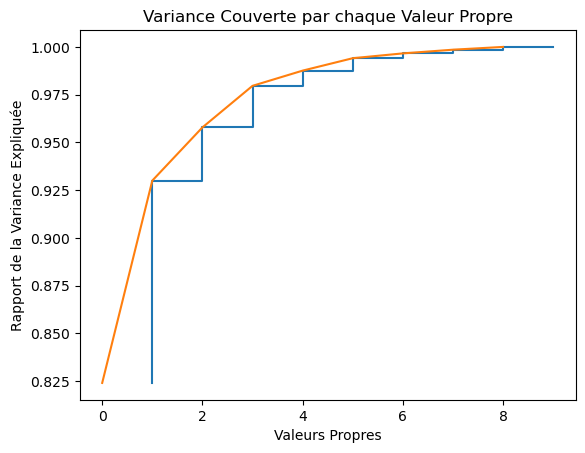

In [17]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Valeurs Propres')
plt.ylabel('Rapport de la Variance Expliquée')
plt.title('Variance Couverte par chaque Valeur Propre')
plt.show()

- C'est une méthode très efficace où nous ajoutons les variances de toutes les caractéristiques de manière cumulative.
- Généralement, les valeurs propres avec plus de 95 % de ratio de variance sont sélectionnées.
- Elles correspondent aux colonnes du dataframe PCA généré.
- Dans ce cas, nous sélectionnons la valeur propre : 2 car les étapes générées ont des variances significatives et donc les autres caractéristiques sont dominées par leurs variances.

In [12]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

,0,1,2
0,0.221182,0.641632,0.088137
1,-0.083852,-0.169805,-0.207449
2,-0.964714,-0.129964,-0.130300
3,-1.508144,0.475270,0.285118
4,-0.267813,-0.238728,-0.059360


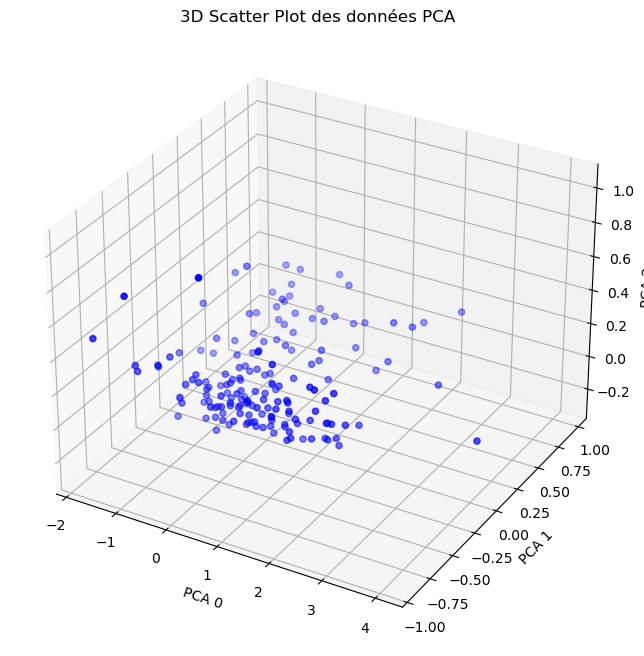

In [19]:
# Extraire les colonnes PCA
pca_col0 = pca_df2[0]
pca_col1 = pca_df2[1]
pca_col2 = pca_df2[2]

# Créer 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_col0, pca_col1, pca_col2, c='b', marker='o')

ax.set_xlabel('PCA 0')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 2')

plt.title('3D Scatter Plot des données PCA')
plt.show()


De cette manière, nous réduisons les dimensions ! 
Nous allons maintenant passer à la section modélisation et comparer les performances des 2 ensembles de données :
- Combinaison de caractéristiques : Santé - Commerce - Finance
- Données PCA

# 6. Modélisation - Apprentissage non supervisé

- Apprentissage non supervisé : Il s'agit d'un problème où la variable cible / caractéristique est inconnue. Les problèmes d'apprentissage non supervisé surviennent largement dans le domaine médical où de multiples mesures sont prises et les maladies sous-jacentes sont inconnues.
- Ainsi, la recherche de motifs à l'aide de techniques de visualisation nous fournit des informations sous-jacentes qui ne peuvent pas être comprises en regardant simplement les données tabulaires.
- Cependant, lorsque la taille des ensembles de données devient énorme avec trop de caractéristiques, la visualisation des données peut être une tâche fastidieuse à exécuter. Par conséquent, nous nous tournons vers une approche algorithmique.

In [13]:
m1 = df.drop(columns = ['Country']).values # Combinaison de caractéristiques : Santé - Commerce - Finance
m2 = pca_df2.values # Données PCA

### Gaussian Mixture

Le clustering GM est un algorithme probabiliste utilisé pour l'apprentissage non supervisé, capable de gérer à la fois des caractéristiques numériques et catégorielles.

- C'est un algorithme polyvalent pour l'apprentissage non supervisé, chargé d'identifier des clusters au sein des données, en utilisant une approche probabiliste :
  - Sélectionne aléatoirement des paramètres initiaux pour les clusters.
  - Attribue chaque point de données au cluster qui maximise la vraisemblance des données observées.
  - Met à jour les paramètres de chaque cluster en fonction des points de données qui lui sont attribués.
  - Répète ce processus jusqu'à ce que la convergence soit atteinte, où les paramètres ne changent plus de manière significative.

- Nombre de clusters : Ce paramètre hyperdéfini le nombre de clusters dans lesquels les données seront partitionnées. Pour sélectionner une valeur appropriée pour k, nous utilisons deux méthodes statistiques :
  - BIC (Critère d'Information Bayésien) : Cette méthode évalue la qualité d'ajustement d'un modèle aux données, en pénalisant les modèles avec plus de paramètres. Le modèle avec la plus faible valeur de BIC est choisi comme nombre optimal de clusters.
  - AIC (Critère d'Information d'Akaike) : Similaire au BIC, l'AIC mesure également la qualité d'ajustement d'un modèle aux données, mais avec un terme de pénalisation différent pour le nombre de paramètres. Le modèle avec la plus faible valeur d'AIC est sélectionné comme nombre optimal de clusters.

#### Combinaison de caractéristiques : Santé - Commerce - Finance

### 6.1 BIC Methode et AIC Methode (pour m1)

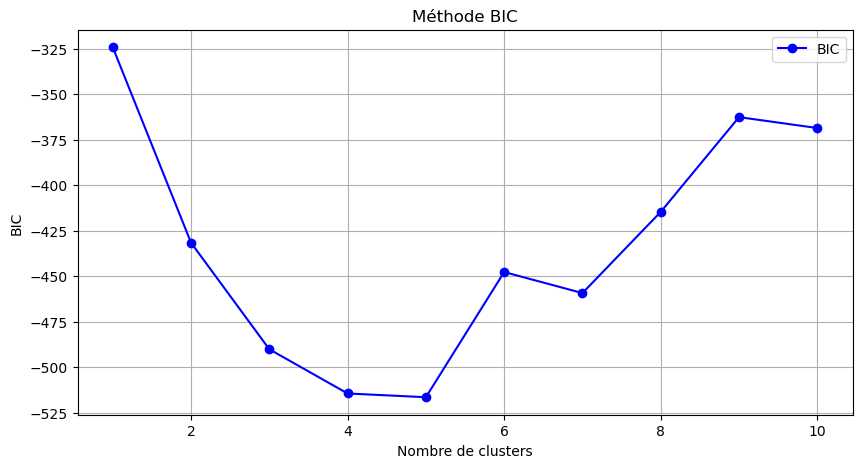

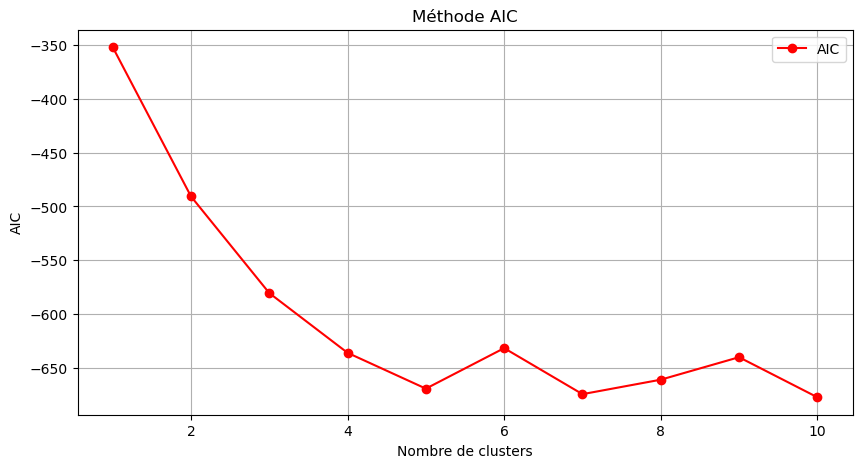

In [21]:
# Créer une liste vide pour stocker les valeurs de BIC et AIC
bic = []
aic = []

# Définir la plage de nombre de clusters à tester
n_components_range = range(1, 11)

# Boucle sur le nombre de clusters pour ajuster les modèles et calculer BIC et AIC
for n_components in n_components_range:
    # Créer et ajuster le modèle de mélange gaussien
    gm = GaussianMixture(n_components=n_components, max_iter=1000).fit(m1)
    
    # Calculer BIC et AIC
    bic.append(gm.bic(m1))
    aic.append(gm.aic(m1))

# Tracer BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic, marker='o', label='BIC', color='blue')
plt.xlabel('Nombre de clusters')
plt.ylabel('BIC')
plt.title('Méthode BIC')
plt.grid()
plt.legend()

# Tracer AIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic, marker='o', label='AIC', color='red')
plt.xlabel('Nombre de clusters')
plt.ylabel('AIC')
plt.title('Méthode AIC')
plt.grid()
plt.legend()

plt.show()


- À partir des résultats des deux méthodes ci-dessus, nous sélectionnons :
  - k : Clusters = 3

### 6.2. Gaussian Mixture (pour m1)

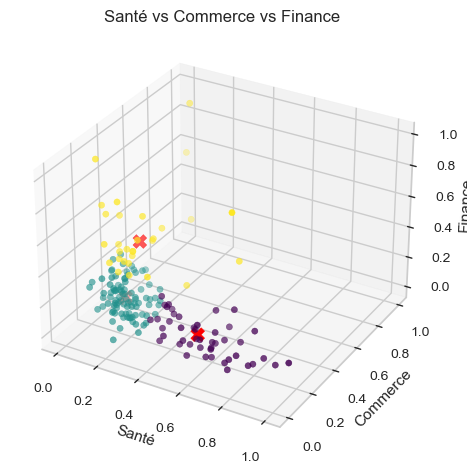

In [64]:
# Instantiate the Gaussian Mixture Model with 3 clusters
model = GaussianMixture(n_components=3, max_iter=1000)

# Fit the model to the data
model.fit(m1)

# Retrieve cluster centers
centroids = model.means_

# Predict cluster labels
labels = model.predict(m1)
data['Class'] = labels
df['Class'] = labels

# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Ensure the correct subplot type is used

x = np.array(df['Santé'])
y = np.array(df['Commerce'])
z = np.array(df['Finance'])

# Plot data points with cluster colors
ax.scatter(x, y, z, c=labels, cmap='viridis')  # Use a colormap for better visualization

# Plot cluster centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='red', s=100)  # Increase marker size for centroids

plt.title('Santé vs Commerce vs Finance')
ax.set_xlabel('Santé')
ax.set_ylabel('Commerce')
ax.set_zlabel('Finance')
plt.show()


- Nous vérifions à nouveau scatterplot du income et du taux de child_mort par rapport aux clusters étiquetés pour confirmer les valeurs des clusters !
- Nous savons qu'un faible income et une forte child_mort sont des signes d'un pays économiquement défavorisé.

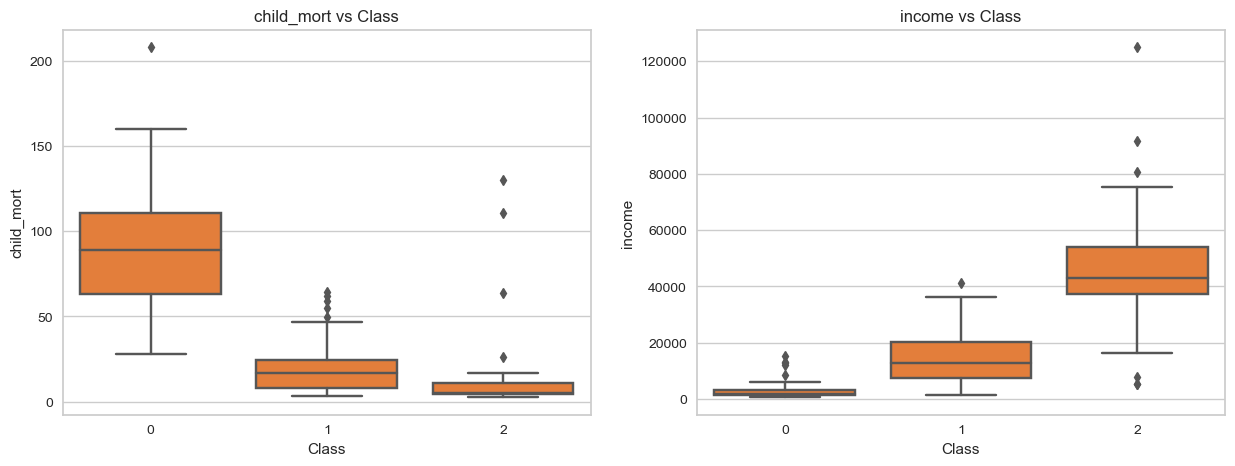

In [65]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

À partir du graphique ci-dessus, nous pouvons conclure :
- 0 : Aide nécessaire
- 1 : Peut-être besoin d'aide
- 2 : Pas besoin d'aide

In [66]:
df['Class'].loc[df['Class'] == 0] = "Aide nécessaire"
df['Class'].loc[df['Class'] == 1] = "Peut-être besoin d'aide"
df['Class'].loc[df['Class'] == 2] = "Pas besoin d'aide"

fig = px.choropleth(df[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Aide nécessaire par pays (Monde)',
                    color = df['Class'],  
                    color_discrete_map = {'Aide nécessaire':'Red',
                                        "Pas besoin d'aide":'Green',
                                        "Peut-être besoin d'aide":'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Étiquettes',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

### 6.3 BIC Methode et AIC Methode (pour m2)

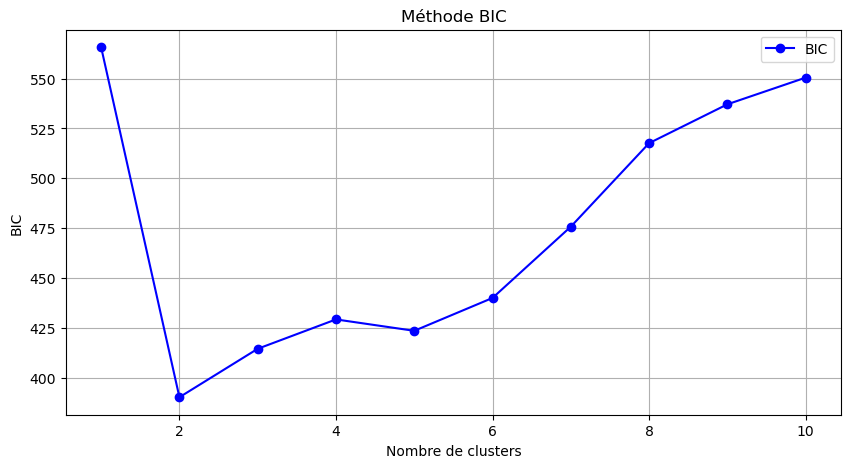

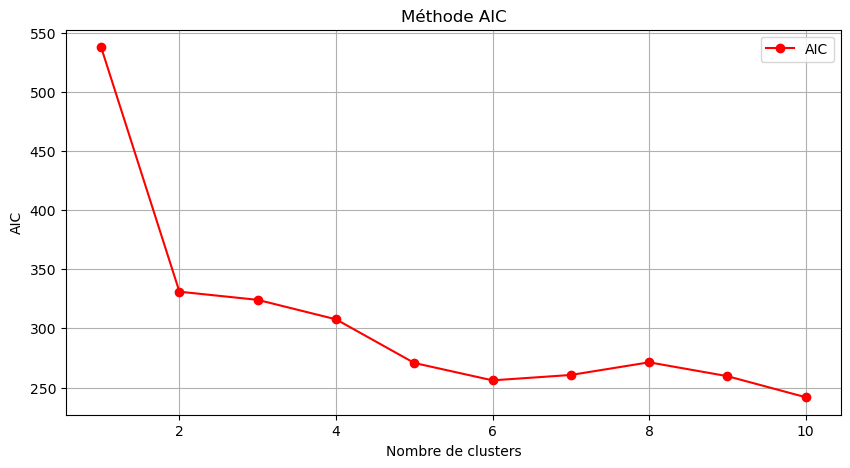

In [22]:
# Créer une liste vide pour stocker les valeurs de BIC et AIC
bic = []
aic = []

# Définir la plage de nombre de clusters à tester
n_components_range = range(1, 11)

# Boucle sur le nombre de clusters pour ajuster les modèles et calculer BIC et AIC
for n_components in n_components_range:
    # Créer et ajuster le modèle de mélange gaussien
    gm = GaussianMixture(n_components=n_components, max_iter=1000).fit(m2)
    
    # Calculer BIC et AIC
    bic.append(gm.bic(m2))
    aic.append(gm.aic(m2))

# Tracer BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic, marker='o', label='BIC', color='blue')
plt.xlabel('Nombre de clusters')
plt.ylabel('BIC')
plt.title('Méthode BIC')
plt.grid()
plt.legend()

# Tracer AIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic, marker='o', label='AIC', color='red')
plt.xlabel('Nombre de clusters')
plt.ylabel('AIC')
plt.title('Méthode AIC')
plt.grid()
plt.legend()

plt.show()


- À partir des résultats des deux méthodes ci-dessus, nous sélectionnons :
  - k : Clusters = 3

### 6.2. Gaussian Mixture (pour m2)

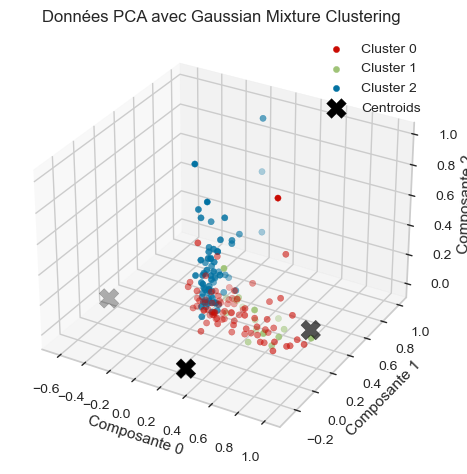

In [85]:
# Fit the Gaussian Mixture Model to the data
model = GaussianMixture(n_components=3, max_iter=1000)
model.fit(m2)

# Predict cluster labels
labels = model.predict(m2)
data['Class'] = labels
pca_df2['Class'] = labels

# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Ensure the correct subplot type is used

# Define colors for each cluster
colors = ['r', 'g', 'b']

# Plot data points with cluster colors
for i, color in enumerate(colors):
    ax.scatter(x[labels == i], y[labels == i], z[labels == i], c=color, label=f'Cluster {i}')

# Plot cluster centroids
centroids = model.means_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='black', s=200, label='Centroids')

plt.title('Données PCA avec Gaussian Mixture Clustering')
ax.set_xlabel('Composante 0')
ax.set_ylabel('Composante 1')
ax.set_zlabel('Composante 2')

# Add legend
ax.legend()

plt.show()


- Nous vérifions à nouveau scatterplot du income et du taux de child_mort par rapport aux clusters étiquetés pour confirmer les valeurs des clusters !
- Nous savons qu'un faible income et une forte child_mort sont des signes d'un pays économiquement défavorisé.

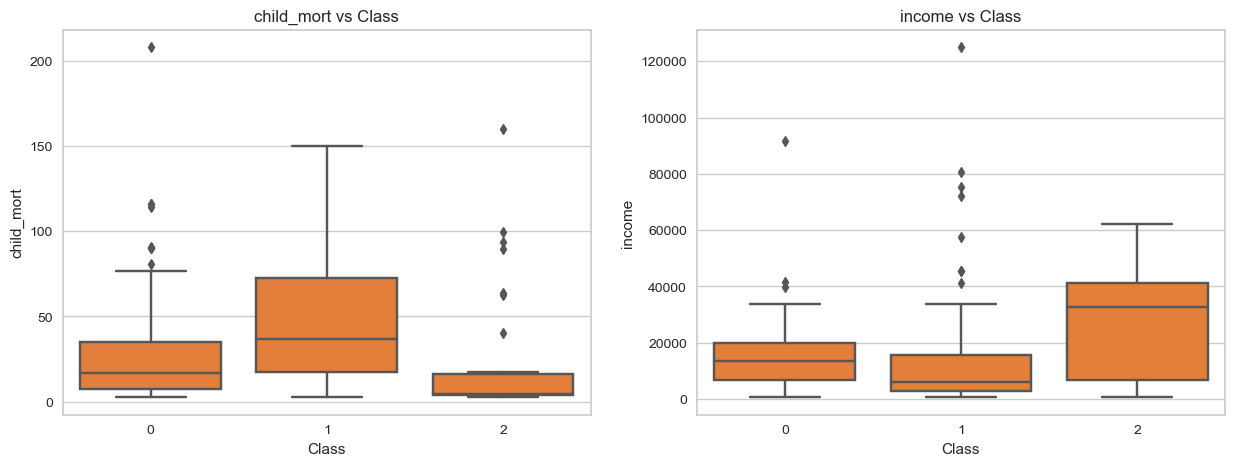

In [115]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

À partir du graphique ci-dessus, nous pouvons conclure :
- 0 : Peut-être besoin d'aide
- 1 : Aide nécessaire
- 2 : Pas besoin d'aide

In [116]:
pca_df2.insert(0,column = 'Country', value = data['country'])

pca_df2['Class'].loc[pca_df2['Class'] == 0] = "Peut-être besoin d'aide"
pca_df2['Class'].loc[pca_df2['Class'] == 1] = "Aide nécessaire"
pca_df2['Class'].loc[pca_df2['Class'] == 2] = "Pas besoin d'aide"

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Aide nécessaire par pays (Monde)',
                    color = pca_df2['Class'],  
                    color_discrete_map = {"Aide nécessaire":'Red',
                                          "Peut-être besoin d'aide":'Yellow',
                                          "Pas besoin d'aide": 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Étiquettes',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

# Modélisation - Apprentissage Supervisé (KNN)

In [29]:
df3 = df2.copy()
df3['Class'] = pca_df2['Class']

In [37]:
df3

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,0.43,0.05,0.28,0.26,0.01,0.13,0.48,0.74,0.00,Peut-être besoin d'aide
1,0.07,0.14,-0.10,0.28,0.07,0.08,0.87,0.08,0.04,Peut-être besoin d'aide
2,0.12,0.19,-0.97,0.18,0.10,0.19,0.88,0.27,0.04,Aide nécessaire
3,0.57,0.31,-1.45,0.25,0.04,0.25,0.55,0.79,0.03,Aide nécessaire
4,0.04,0.23,-0.29,0.34,0.15,0.05,0.88,0.15,0.11,Peut-être besoin d'aide
...,...,...,...,...,...,...,...,...,...,...
162,0.13,0.23,-0.57,0.30,0.02,0.06,0.61,0.37,0.03,Aide nécessaire
163,0.07,0.14,-0.70,0.10,0.13,0.46,0.85,0.21,0.13,Aide nécessaire
164,0.10,0.36,0.01,0.46,0.03,0.15,0.81,0.13,0.01,Peut-être besoin d'aide
165,0.26,0.15,-0.60,0.20,0.03,0.26,0.70,0.56,0.01,Aide nécessaire


Rapport de classification pour l'ensemble d'entraînement:
                         precision    recall  f1-score   support

        Aide nécessaire       0.98      1.00      0.99        53
      Pas besoin d'aide       0.96      1.00      0.98        22
Peut-être besoin d'aide       1.00      0.95      0.97        41

               accuracy                           0.98       116
              macro avg       0.98      0.98      0.98       116
           weighted avg       0.98      0.98      0.98       116



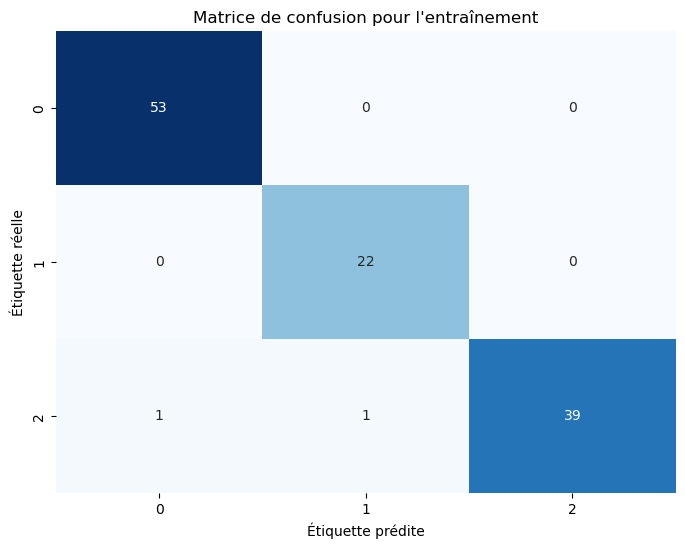

Rapport de classification pour l'ensemble de test:
                         precision    recall  f1-score   support

        Aide nécessaire       1.00      0.96      0.98        23
      Pas besoin d'aide       0.91      0.91      0.91        11
Peut-être besoin d'aide       0.89      0.94      0.91        17

               accuracy                           0.94        51
              macro avg       0.93      0.94      0.93        51
           weighted avg       0.94      0.94      0.94        51



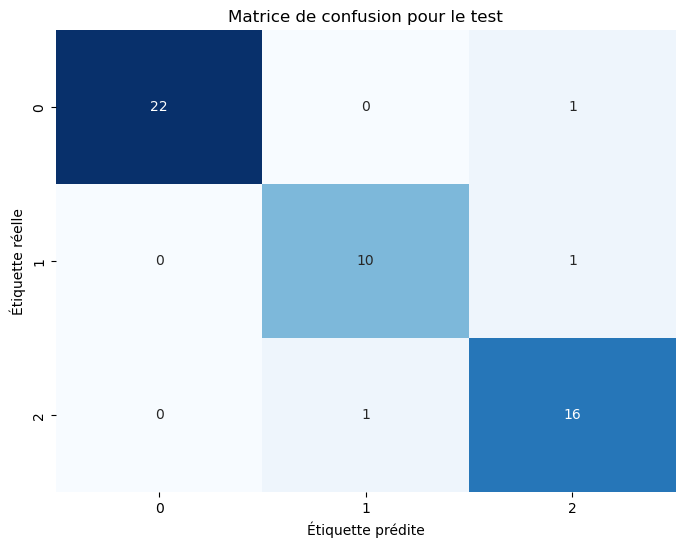

In [38]:
X = df3.drop('Class', axis=1)
y = df3['Class']

# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser le classifieur kNN
k = 3 
knn = KNeighborsClassifier(n_neighbors=k)

# Entraîner le classifieur
knn.fit(X_train, y_train)

# Prédire les étiquettes pour l'ensemble d'entraînement
y_train_pred = knn.predict(X_train)

# Prédire les étiquettes pour l'ensemble de test
y_test_pred = knn.predict(X_test)

# Rapport de classification pour l'ensemble d'entraînement
print("Rapport de classification pour l'ensemble d'entraînement:")
print(classification_report(y_train, y_train_pred))

# Calculer la matrice de confusion pour l'ensemble d'entraînement
cm_train = confusion_matrix(y_train, y_train_pred)

# Tracer la matrice de confusion pour l'ensemble d'entraînement
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matrice de confusion pour l'entraînement")
plt.xlabel('Étiquette prédite')
plt.ylabel('Étiquette réelle')
plt.show()

# Rapport de classification pour l'ensemble de test
print("Rapport de classification pour l'ensemble de test:")
print(classification_report(y_test, y_test_pred))

# Calculer la matrice de confusion pour l'ensemble de test
cm_test = confusion_matrix(y_test, y_test_pred)

# Tracer la matrice de confusion pour l'ensemble de test
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion pour le test')
plt.xlabel('Étiquette prédite')
plt.ylabel('Étiquette réelle')
plt.show()


### Sauvegarder le model

In [39]:

dump(knn, r'C:\Users\dell\Downloads\model.joblib')



['C:\\Users\\dell\\Downloads\\model.joblib']